In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

wine_150k = pd.read_csv('D:\wine_reserch\winemag-data_first150k.csv',index_col=0)
wine_130k = pd.read_csv('D:\wine_reserch\winemag-data-130k-v2.csv',index_col=0)
wine = pd.concat([wine_150k,wine_130k],axis=0)

In [3]:
%matplotlib inline

In [2]:
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,NaN,NaN,NaN,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,NaN,NaN,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,NaN,NaN,NaN,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,NaN,NaN,NaN,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,NaN,NaN,NaN,Provence red blend,Domaine de la Bégude


In [4]:
print('Number of country list in data:',wine['country'].nunique())

Number of country list in data: 50


In [5]:
plt.figure(figsize=(14,10))

In [6]:
cnt = wine['country'].value_counts().to_frame()[0:20]

In [9]:
cnt

,country
US,116901
France,43191
Italy,43018
Spain,14913
Portugal,11013
Chile,10288
Argentina,9431
Australia,7286
Austria,6402
New Zealand,4739


Text(0.5,1,'Distribution of Wine Reviews by Top 20 Countries')

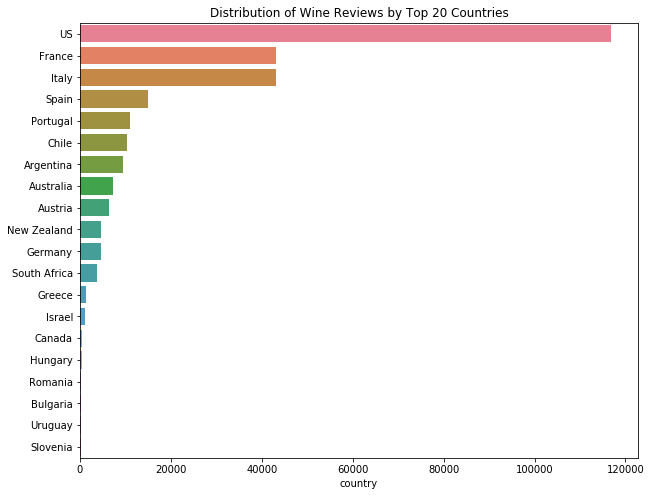

In [49]:
plt.figure(figsize=(10, 8))
sns.barplot(x= cnt['country'], y =cnt.index, data=cnt, palette='husl',orient='h')
plt.title('Distribution of Wine Reviews by Top 20 Countries')

Text(0,0.5,'Country')

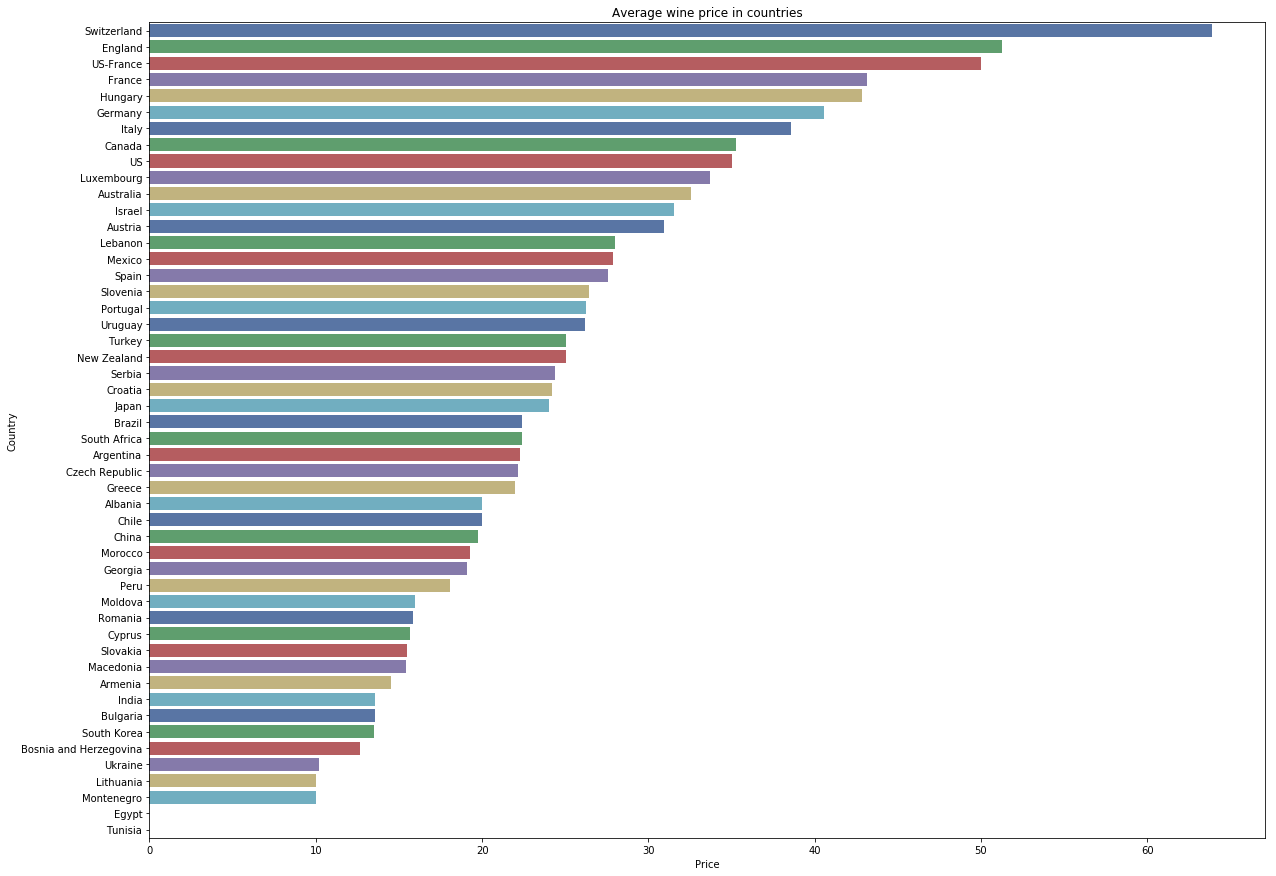

In [26]:
wine_price = wine.groupby(['country']).mean()['price'].sort_values(ascending=False).to_frame()

plt.figure(figsize=(20,15))
sns.barplot(x = wine_price['price'] ,y = wine_price.index ,data=wine_price, palette='deep', orient='h')
plt.title('Average wine price in countries')
plt.xlabel('Price')
plt.ylabel('Country')

Text(0,0.5,'Country')

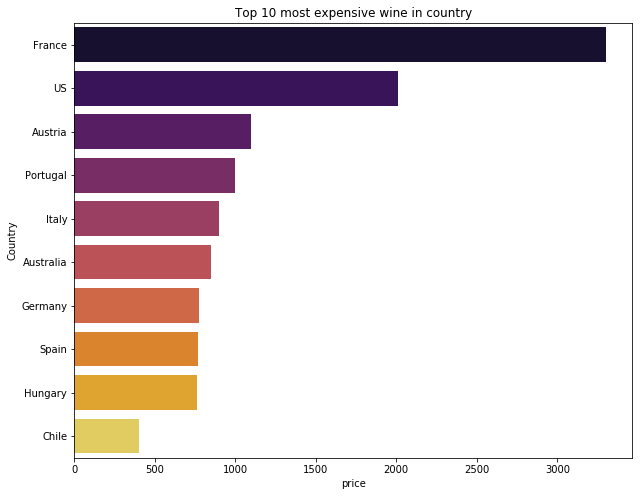

In [48]:
plt.figure(figsize=(10, 8))
wine_max_price = wine.groupby(['country'])['price'].max().sort_values(ascending=False).to_frame()[:10]
sns.barplot(x = wine_max_price['price'], y = wine_max_price.index, palette= 'inferno',data=wine_max_price)
plt.title('Top 10 most expensive wine in country')
plt.ylabel('Country')

Text(0,0.5,'Country')

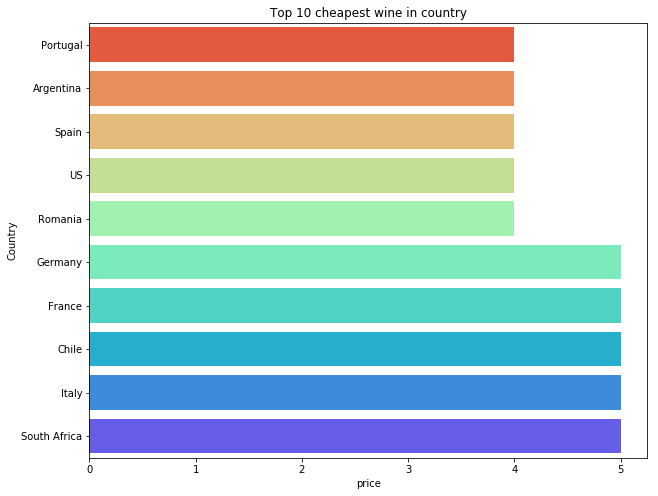

In [47]:
plt.figure(figsize=(10, 8))
wine_min_price = wine.groupby(['country'])['price'].min().sort_values(ascending=True).to_frame()[:10]
sns.barplot(x = wine_min_price['price'], y = wine_min_price.index, palette = 'rainbow_r',data=wine_min_price)
plt.title('Top 10 cheapest wine in country')
plt.ylabel('Country')

Text(0,0.5,'Country')

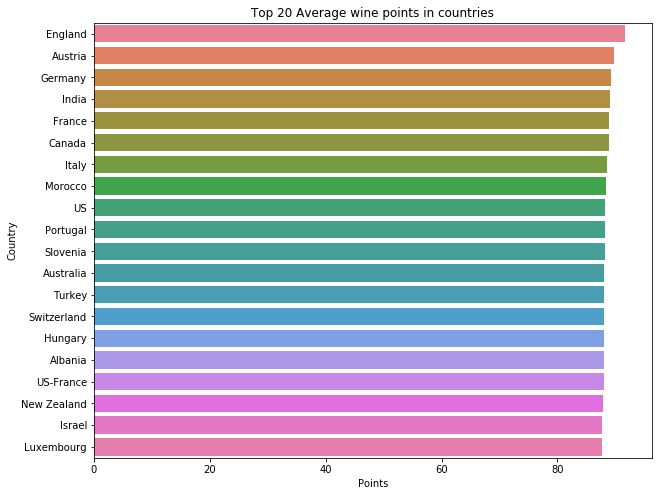

In [46]:
wine_points = wine.groupby(['country']).mean()['points'].sort_values(ascending=False).to_frame()[0:20]
plt.figure(figsize=(10, 8))

sns.barplot(x = wine_points['points'], y = wine_points.index, data=wine_points, palette='husl', orient='h')
plt.title('Top 20 Average wine points in countries')
plt.xlabel('Points')
plt.ylabel('Country')

Text(0.5,1,'Taster Name')

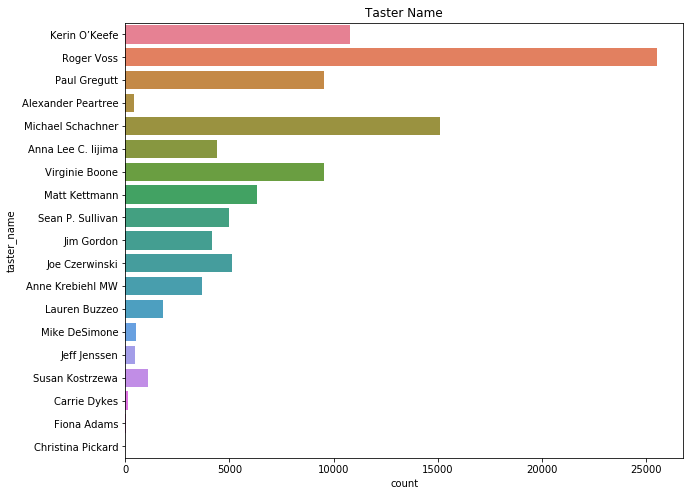

In [45]:
plt.figure(figsize=(10, 8))
sns.countplot(y = wine['taster_name'], palette = 'husl', data=wine['taster_name'])
plt.title('Taster Name')

Text(0.5,1,'The relationship between pints and price')

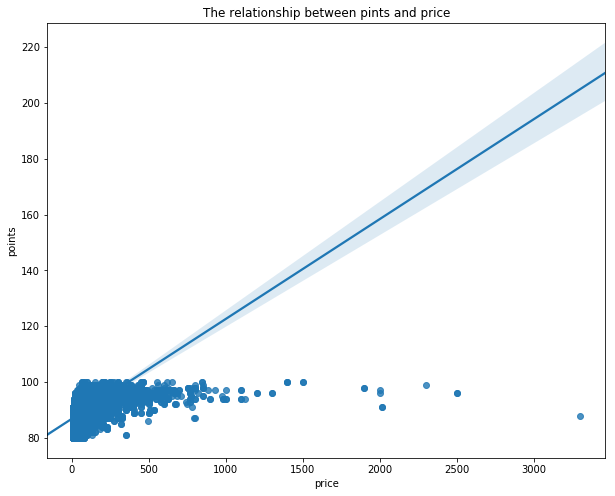

In [55]:
plt.figure(figsize=(10,8))
sns.regplot(x=wine['price'], y=wine['points'], data=wine)
plt.title('The relationship between pints and price')

In [60]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

(-0.5, 399.5, 199.5, -0.5)

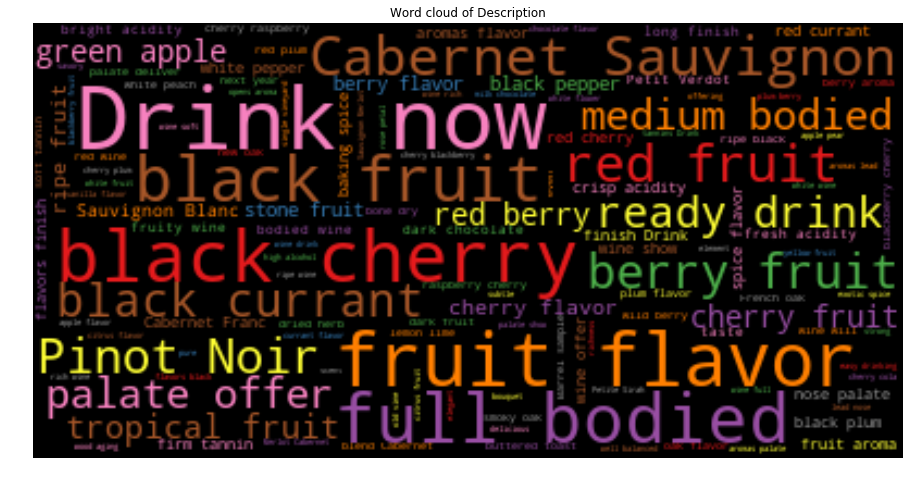

In [72]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description')
wc = WordCloud(max_words=1000,max_font_size=40,background_color='black', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(wine['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')